In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
# oceans16 | grade3 | chesterish | onedork | monokai | solarizedl
jtplot.style('solarized-light')

In [28]:
df=pd.read_excel('data/wind_farms_with_ws_2k_5k_sgouris edited.xlsx',sheetname='BASE')
df=df.dropna()
df=df.set_index(['ISO_CODE','Year'])
df=df[((df['POWER_KW']>0)&(df['POWER_KW']<1000000)&(df['OFFSHORE']=='no'))]

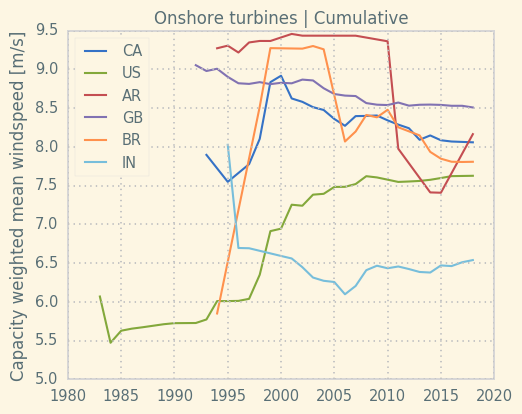

In [29]:
cs={'BR','AR','GB','CA','US','IN'}
for c in cs:
    x=[]
    y=[]
    z=[]
    for i in df.loc[c].sort_index().index.unique():
        x.append(i)
        dz=df.loc[c].loc[[k for k in df.loc[c].index.unique() if k<=i]]
        try:
            z.append(np.average(dz['WS_est'],weights=dz['POWER_KW'].astype(float).values))
        except:
            z.append(np.average(dz['WS_est']))
    #plt.plot(x,y,label=c)
    plt.plot(x,z,label=c)
plt.ylabel('Capacity weighted mean windspeed [m/s]')
plt.title("Onshore turbines | Cumulative")
plt.legend(loc=0)

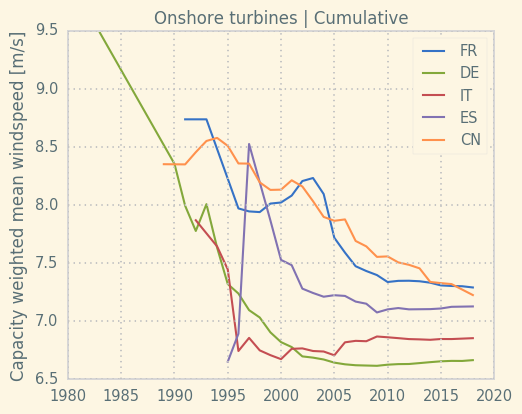

In [30]:
cs={'FR','DE','CN','IT','ES'}
for c in cs:
    x=[]
    y=[]
    z=[]
    for i in df.loc[c].sort_index().index.unique():
        x.append(i)
        dz=df.loc[c].loc[[k for k in df.loc[c].index.unique() if k<=i]]
        try:
            z.append(np.average(dz['WS_est'],weights=dz['POWER_KW'].astype(float).values))
        except:
            z.append(np.average(dz['WS_est']))
    #plt.plot(x,y,label=c)
    plt.plot(x,z,label=c)
plt.ylabel('Capacity weighted mean windspeed [m/s]')
plt.title("Onshore turbines | Cumulative")
plt.legend(loc=0)

In [31]:
df=pd.read_excel('data/wind_farms_with_ws_2k_5k_sgouris edited.xlsx',sheetname='BASE')
df=df.dropna()
df=df.set_index('Year')
df=df[((df['POWER_KW']>0)&(df['OFFSHORE']=='no'))]

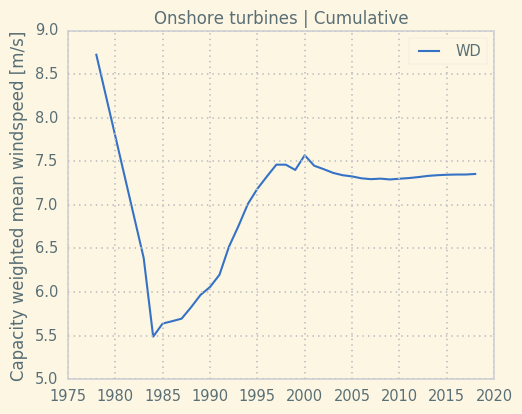

In [32]:
x=[]
y=[]
z=[]
for i in df.sort_index().index.unique():
    x.append(i)
    dz=df.loc[[k for k in df.index.unique() if k<=i]]
    try:
        z.append(np.average(dz['WS_est'],weights=dz['POWER_KW'].astype(float).values))
    except:
        z.append(np.average(dz['WS_est']))
plt.plot(x,z,label='WD')
plt.ylabel('Capacity weighted mean windspeed [m/s]')
plt.title("Onshore turbines | Cumulative")
plt.legend(loc=0)